### Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
import os
import cv2 as cv
import imghdr
from IPython.display import Image

In [8]:
import tensorflow as tf
import keras

In [105]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

### Remove Dodgy Images

In [12]:
exts = ['jpeg', 'jpg', 'png', 'bmp']

In [37]:
folder = 'Cats'

# Did this operation before putting Folders "Cats" and "Dogs" into the folder "Data"

for image in os.listdir(folder):
    image_path = os.path.join(folder, image)
    try:
        img = cv.imread(image_path)
        img_ext = imghdr.what(image_path)
        if img_ext not in exts:
            print(f'Image {image_path} Not in Extension List')
            os.remove(image_path)
    except Exception as e:
        print(f'Issue with Image{image_path}')

In [41]:
folder = 'Dogs'

# Did this operation before putting Folders "Cats" and "Dogs" into the folder "Data"

for image in os.listdir(folder):
    image_path = os.path.join(folder, image)
    try:
        img = cv.imread(image_path)
        img_ext = imghdr.what(image_path)
        if img_ext not in exts:
            print(f'Image {image_path} Not in Extension List')
            os.remove(image_path)
    except Exception as e:
        print(f'Issue with Image{image_path}')

### Data Augmentation By Rotating Images 180deg

In [49]:
rotate_code = cv.ROTATE_180

In [55]:
folder = 'Cats'

# Did this operation before putting Folders "Cats" and "Dogs" into the folder "Data"

for image in os.listdir(folder):
    image_path = os.path.join(folder, image)
    img = cv.imread(image_path)
    rotated_img = cv.rotate(img, rotate_code)
    output_path = os.path.join(folder, f'rotated_{image}')
    cv.imwrite(output_path, rotated_img)
    print(f'Image {image_path} rotated successfully as Image {output_path}')

Image Cats\07CAT-STRIPES-mediumSquareAt3X-v2.jpg rotated successfully as Image Cats\rotated_07CAT-STRIPES-mediumSquareAt3X-v2.jpg
Image Cats\107091667.jpg rotated successfully as Image Cats\rotated_107091667.jpg
Image Cats\1200px-Cat_August_2010-4.jpg rotated successfully as Image Cats\rotated_1200px-Cat_August_2010-4.jpg
Image Cats\12cli-cats-mediumSquareAt3X.jpg rotated successfully as Image Cats\rotated_12cli-cats-mediumSquareAt3X.jpg
Image Cats\20110217-116mm.jpg rotated successfully as Image Cats\rotated_20110217-116mm.jpg
Image Cats\20481.jpg rotated successfully as Image Cats\rotated_20481.jpg
Image Cats\220325case013.jpg rotated successfully as Image Cats\rotated_220325case013.jpg
Image Cats\220805-domestic-cat-mjf-1540-382ba2.jpg rotated successfully as Image Cats\rotated_220805-domestic-cat-mjf-1540-382ba2.jpg
Image Cats\2AE14CDD-1265-470C-9B15F49024186C10_source.jpg rotated successfully as Image Cats\rotated_2AE14CDD-1265-470C-9B15F49024186C10_source.jpg
Image Cats\32665E6F-

In [57]:
folder = 'Dogs'
c = 0

# Did this operation before putting Folders "Cats" and "Dogs" into the folder "Data"

for image in os.listdir(folder):
    image_path = os.path.join(folder, image)
    img = cv.imread(image_path)
    rotated_img = cv.rotate(img, rotate_code)
    output_path = os.path.join(folder, f'rotated_{image}')
    cv.imwrite(output_path, rotated_img)
    print(f'Image {image_path} rotated successfully as Image {output_path}')
    c = c + 1
print(f'Total Number of Images in {folder} Folder is {c}')

Image Dogs\1200px-Labrador_Retriever_portrait.jpg rotated successfully as Image Dogs\rotated_1200px-Labrador_Retriever_portrait.jpg
Image Dogs\1655430860853.jpeg rotated successfully as Image Dogs\rotated_1655430860853.jpeg
Image Dogs\1700486907837_tdy_news_8a_kreutz_mystery_dog_illness_231120_1920x1080-ggrpnf.jpg rotated successfully as Image Dogs\rotated_1700486907837_tdy_news_8a_kreutz_mystery_dog_illness_231120_1920x1080-ggrpnf.jpg
Image Dogs\191006152638-01-pets-and-our-health.jpg rotated successfully as Image Dogs\rotated_191006152638-01-pets-and-our-health.jpg
Image Dogs\220805-border-collie-play-mn-1100-82d2f1.jpg rotated successfully as Image Dogs\rotated_220805-border-collie-play-mn-1100-82d2f1.jpg
Image Dogs\360_F_559274893_O9iSRQwTKIkAooNTglilMgx2yMcXK9Or.jpg rotated successfully as Image Dogs\rotated_360_F_559274893_O9iSRQwTKIkAooNTglilMgx2yMcXK9Or.jpg
Image Dogs\360_F_583881510_lmamhS4SpuSl9llbY3LAZwXVspFA591M.jpg rotated successfully as Image Dogs\rotated_360_F_583881510

### Load Data

In [65]:
# Did this operation after putting Folders "Cats" and "Dogs" into the folder "Data"
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 918 files belonging to 2 classes.


In [69]:
data_next = data.as_numpy_iterator()
batch = data_next.next()

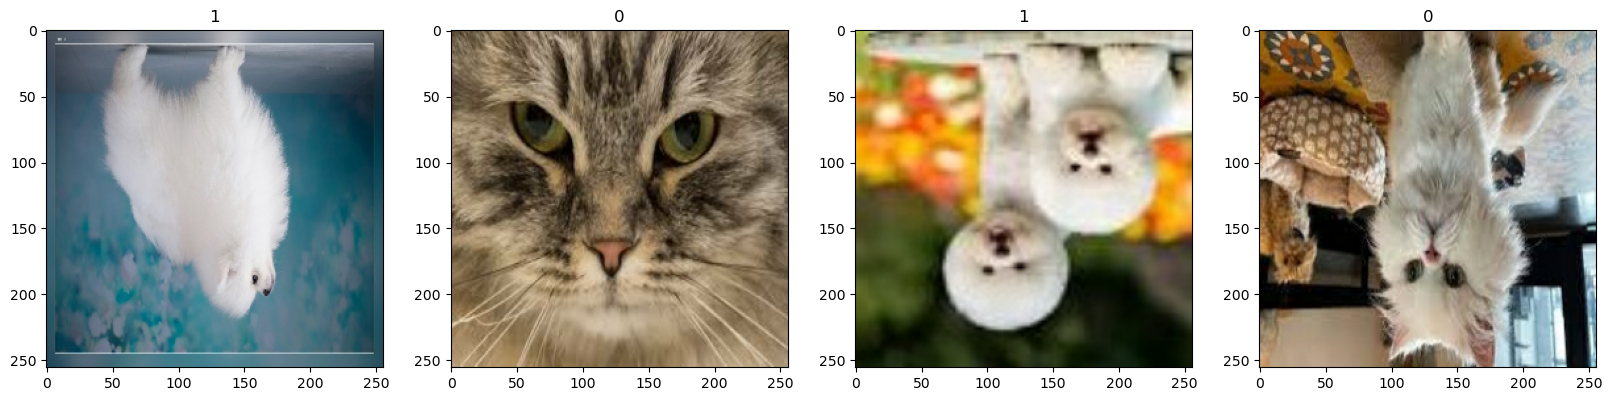

In [72]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scaling Data

In [78]:
data = data.map(lambda x,y : (x/255, y))
data.as_numpy_iterator().next

<bound method NumpyIterator.next of <tensorflow.python.data.ops.dataset_ops.NumpyIterator object at 0x00000178E01AA890>>

### Split Data into Training, Validation and Testing Sets

In [88]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [91]:
print(train_size, val_size, test_size)

20 5 2


In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Build CNN

In [136]:
model = Sequential()

model.add(Conv2D(24, (4,4), strides = (1,1), input_shape = (256, 256, 3)))
model.add(MaxPooling2D((4,4) , strides = (4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (4,4), strides = (1,1), padding = 'valid'))
model.add(MaxPooling2D((4,4) , strides = (4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (4,4), strides = (1,1), padding = 'valid'))
# model.add(MaxPooling2d((4,4) , strides = (4,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate = 0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [138]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [140]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 253, 253, 24)      1176      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 125, 24)       0         
 g2D)                                                            
                                                                 
 activation_5 (Activation)   (None, 63, 125, 24)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 122, 48)       18480     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 60, 48)        0         
 g2D)                                                            
                                                                 
 activation_6 (Activation)   (None, 15, 60, 48)       

### Use Tensorboard Inline

In [127]:
logdir = 'logs'

In [129]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

### Fit the Model

In [142]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20


20/20 [==============================] - 40s 2s/step - loss: 0.8537 - accuracy: 0.6359 - val_loss: 0.6447 - val_accuracy: 0.7250
Epoch 2/20
20/20 [==============================] - 38s 2s/step - loss: 0.6390 - accuracy: 0.6719 - val_loss: 0.5665 - val_accuracy: 0.7250
Epoch 3/20
20/20 [==============================] - 37s 2s/step - loss: 0.6096 - accuracy: 0.6781 - val_loss: 0.5801 - val_accuracy: 0.6875
Epoch 4/20
20/20 [==============================] - 38s 2s/step - loss: 0.5757 - accuracy: 0.7188 - val_loss: 0.5545 - val_accuracy: 0.7312
Epoch 5/20
20/20 [==============================] - 35s 2s/step - loss: 0.6245 - accuracy: 0.6484 - val_loss: 0.6166 - val_accuracy: 0.6625
Epoch 6/20
20/20 [==============================] - 218s 11s/step - loss: 0.6125 - accuracy: 0.6922 - val_loss: 0.6450 - val_accuracy: 0.7000
Epoch 7/20
20/20 [==============================] - 16s 767ms/step - loss: 0.5738 - accuracy: 0.7328 - val_loss: 0.4738 - val_accuracy: 0.7812
Epoch 8/20
20

### Performance Graphs

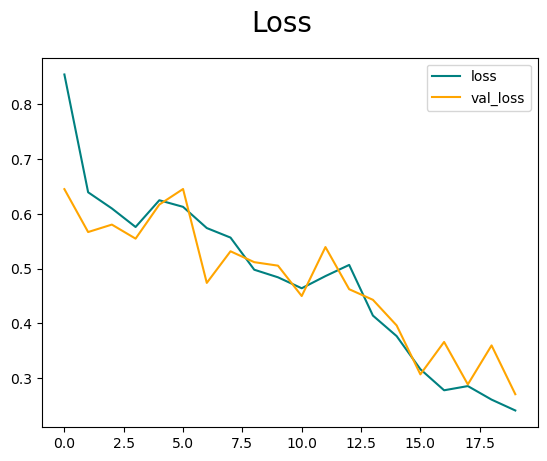

In [146]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show();

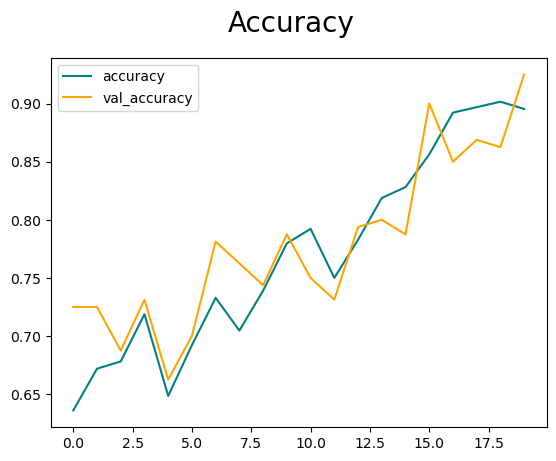

In [149]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show();

### Test With Random Images

In [253]:
img = cv.imread('TestingSet/fluffiest-dogs-ever-4589343-hero-939e88f02bae4cfdb557bb7c15ee5384.jpg')

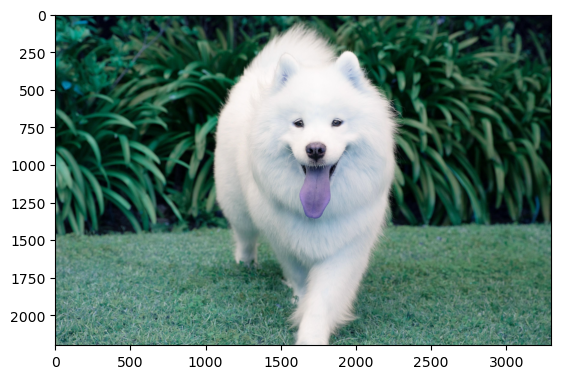

In [257]:
plt.imshow(img);

In [258]:
resize_img = tf.image.resize(img, (256,256))

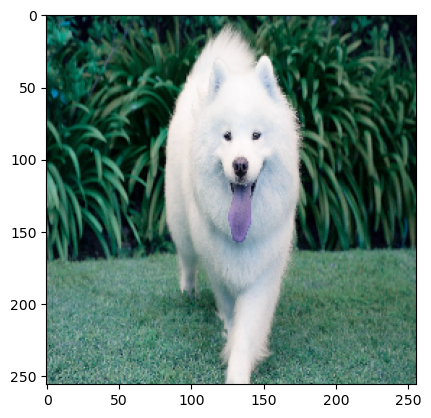

In [259]:
plt.imshow(resize_img.numpy().astype(int))
plt.show();

In [263]:
pred = model.predict(np.expand_dims(resize_img/255, 0))

1/1 [==============================] - 0s 27ms/step


In [265]:
pred

array([[0.9850001]], dtype=float32)

In [267]:
if pred > 0.5:
    print('Dog')
else:
    print('Cat')

Dog


### Testing the Entire Testing Set

In [269]:
folder = 'TestingSet'
for image in os.listdir(folder):
    image_path = os.path.join(folder, image)
    img = cv.imread(image_path)
    resize_img = tf.image.resize(img, (256,256))
    pred = model.predict(np.expand_dims(resize_img/255, 0))
    print(f'Image {image_path} is a ')
    if pred > 0.5:
        print('Dog')
    else:
        print('Cat')

1/1 [==============================] - 0s 28ms/step
Image TestingSet\download (1).jpeg is a 
Cat
1/1 [==============================] - 0s 28ms/step
Image TestingSet\download.jpeg is a 
Cat
1/1 [==============================] - 0s 23ms/step
Image TestingSet\download1.jpeg is a 
Cat
1/1 [==============================] - 0s 31ms/step
Image TestingSet\fluffiest-dogs-ever-4589343-hero-939e88f02bae4cfdb557bb7c15ee5384.jpg is a 
Dog
1/1 [==============================] - 0s 30ms/step
Image TestingSet\samoyed-dog-royalty-free-image-1657722708.jpg is a 
Dog
1/1 [==============================] - 0s 38ms/step
Image TestingSet\samoyed-running-snow-300286465jpg-42266f129fd642a2adb3aa1ba2ef7a61.jpg is a 
Cat
